In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
import matplotlib.pyplot as plt
import numpy as np
y= df.iloc[0:100, 4].values
# series가 아닌 ndarray 객체라 value_counts는 쓸 수 없다.
np.unique( y , return_counts=True)[1] 

array([50, 50], dtype=int64)

In [5]:
y= np.where(y=='Iris-setosa', 1,-1)

#sepal_length 와 petal_length를 추출한다.
X= df.iloc[0:100, [0,2]].values


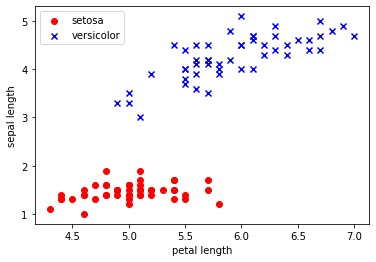

In [6]:
# 2차원 산점도를 사용해 시각화한다.
# 입력변수를 50/ 50으로 나눠준다.

plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color ='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [7]:
#perceptron 클래스 생성

class Perceptron(object):
    '''
    parameters
    
    eta: learning rate
    n_iter: pass over the training dataset
    
    w_ : weights after fitting
    errors: number of misclassifications in every epoch
    
    '''
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_=[]
        
        for _ in range(self.n_iter):
            errors=0
            for xi, target in zip(X,y):
                update= self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0 ,1 ,-1)
            

In [8]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

In [9]:
X,y

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3],
        [4.6, 1.5],
        [5. , 1.4],
        [5.4, 1.7],
        [4.6, 1.4],
        [5. , 1.5],
        [4.4, 1.4],
        [4.9, 1.5],
        [5.4, 1.5],
        [4.8, 1.6],
        [4.8, 1.4],
        [4.3, 1.1],
        [5.8, 1.2],
        [5.7, 1.5],
        [5.4, 1.3],
        [5.1, 1.4],
        [5.7, 1.7],
        [5.1, 1.5],
        [5.4, 1.7],
        [5.1, 1.5],
        [4.6, 1. ],
        [5.1, 1.7],
        [4.8, 1.9],
        [5. , 1.6],
        [5. , 1.6],
        [5.2, 1.5],
        [5.2, 1.4],
        [4.7, 1.6],
        [4.8, 1.6],
        [5.4, 1.5],
        [5.2, 1.5],
        [5.5, 1.4],
        [4.9, 1.5],
        [5. , 1.2],
        [5.5, 1.3],
        [4.9, 1.5],
        [4.4, 1.3],
        [5.1, 1.5],
        [5. , 1.3],
        [4.5, 1.3],
        [4.4, 1.3],
        [5. , 1.6],
        [5.1, 1.9],
        [4.8, 1.4],
        [5.1, 1.6],
        [4.6, 1.4],
        [5.3, 1.5],
        [5. , 1.4],


In [15]:
ppn.errors_

[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]

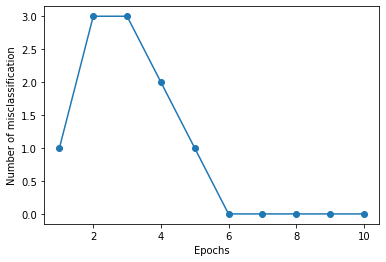

In [10]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassification')
plt.show()

In [11]:
len(ppn.errors_)

10

In [12]:
from matplotlib.colors import ListedColormap

In [13]:
def plot_decision_regions(X, y , classifier, resolution=0.02):
        #산점도 마커, 색상
        markers=('s', 'x', 'o', '^', 'v')
        colors=('red','blue','lightgreen','gray','cyan')
        cmap= ListedColormap(colors[:len(np.unique(y))])
        
        x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
        x2_min, x2_max= X[:,1].min()-1, X[:,1].max()+1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        print(x1_min, x1_max, x2_min, x2_max)
        # classifier는 위에서 만든 perceptron 클래스 다. predict 인수로 X를 받는데 이때  x는 특성이 2인 행렬이다. 
        # 특성이 2다는 것은 , 열이 2 . ravel() 을 통해 2행을 만들고 transpose해 2열의 array를 만든다. 
        # predict를 통해 1차원의 값을 만든다.
        
        Z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        
    # reshape를 통해 예측값의 shape를 바꿔준다.
    #등고선과 색상 구분만 해준다. 산점도는 밑에서
    # Z는 xx1, xx2에서의 예측값을 나타내는 2차원 배열. 등고선의 높이로 사용된다.
        Z= Z.reshape(xx1.shape)
        print(Z.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4,cmap=cmap)
        plt.ylim(xx2.min(), xx2.max())
        plt.xlim(xx1.min(), xx1.max())
        
        for idx, cl in enumerate(np.unique(y)):
            # X에서 y레이블이 cl값인 경우의 첫번째 특성값 -> x , X에서 y레이블이 cl인 두번째 특성값 -> y
            plt.scatter(x=X[y== cl, 0], y=X[y==cl, 1],
                       alpha=0.8, c= cmap(idx),
                       marker=markers[idx], label=cl)
            

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


3.3 8.0 0.0 6.1
(305, 235)


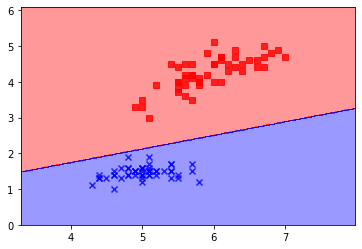

In [14]:
plot_decision_regions(X,y, classifier=ppn)